In [8]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
r = requests.get('https://api.alternative.me/fng/?limit=0')
df = pd.DataFrame(r.json()['data'])

In [10]:
# Data handling
df.value = df.value.astype(int)
df.timestamp = pd.to_datetime(df.timestamp,unit = 's')
df.set_index('timestamp', inplace = True)

<AxesSubplot:xlabel='timestamp'>

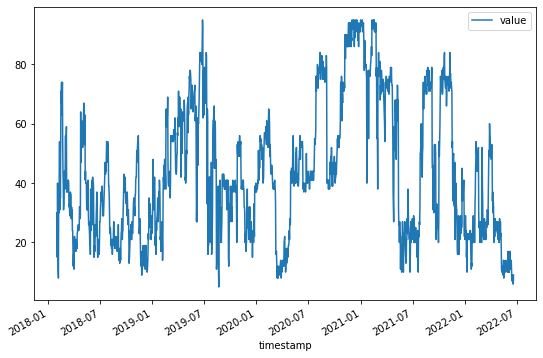

In [11]:
# Visaulizing
df.plot(figsize = (9,6))

In [12]:
df.describe()

,value
count,1598.000000
mean,44.014393
std,22.827093
min,5.000000
25%,24.000000
50%,40.000000
75%,61.000000
max,95.000000


In [13]:
# Adding BTC data
import yfinance as yf
df1 = yf.download('BTC-USD')[['Close']] / 1000
df1.index.name = 'timestamp'
#df1 = df1.shift(-1)
df1 = df1.dropna()
merged_df = df.merge(df1,on = 'timestamp')
merged_df.corr()

[*********************100%***********************]  1 of 1 completed


,value,Close
value,1.000000,0.243873
Close,0.243873,1.000000


In [14]:
merged_df.head()
exporting_df = merged_df[['value','Close']]
exporting_df.head()

,value,Close
timestamp,,
2022-06-20,9,20.597965
2022-06-19,6,20.553271
2022-06-18,6,19.017643
2022-06-17,9,20.471482
2022-06-16,7,20.381650


In [15]:
exporting_df.to_csv('BTC_index.csv')

In [16]:
exporting_df[1:501].describe()

,value,Close
count,500.000000,500.000000
mean,42.932000,45.081423
std,24.785884,9.854888
min,6.000000,19.017643
25%,22.000000,38.142776
50%,32.000000,44.391463
75%,71.000000,51.858957
max,95.000000,67.566828


In [17]:
exporting_df[500:].describe()

,value,Close
count,1098.000000,1098.000000
mean,44.572860,9.436178
std,21.872604,5.926714
min,5.000000,3.236762
25%,27.000000,6.529727
50%,41.000000,8.340813
75%,57.000000,10.227403
max,95.000000,40.797609


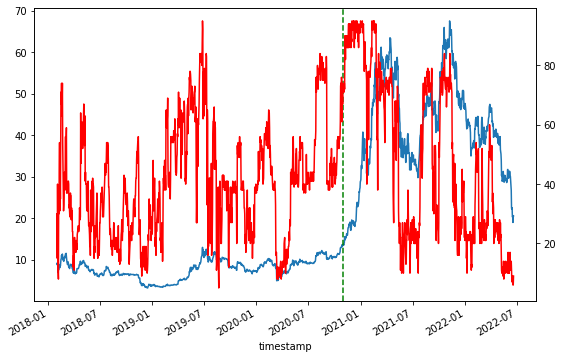

In [18]:
ax = merged_df.Close.plot(figsize = (9,6))
ax.axvline("2020-11-01", color="green", linestyle="dashed")
ax2=ax.twinx()
ax2.plot(merged_df.value, color = 'red')

In [19]:
# Importing stats packages
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

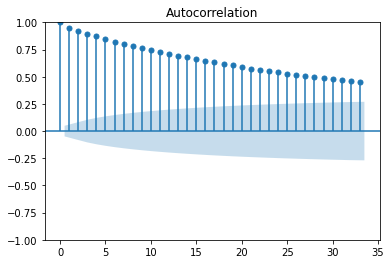

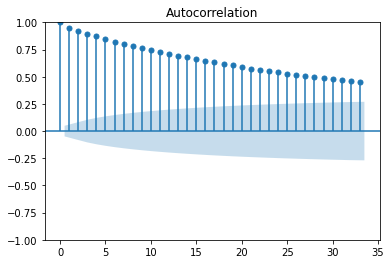

In [20]:
# Plotting ACF
plot_acf(df.value)

In [21]:
# Estimating an AR(1) model
mod = ARIMA(df.value, order=(1,0, 0))
res = mod.fit()

C:\Users\TFRANCE\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\TFRANCE\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\TFRANCE\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\TFRANCE\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g.

In [22]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                 1598
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -5390.621
Date:                Mon, 20 Jun 2022   AIC                          10787.241
Time:                        11:18:21   BIC                          10803.371
Sample:                             0   HQIC                         10793.231
                               - 1598                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.4271      3.536     12.281      0.000      36.496      50.358
ar.L1          0.9512      0.010     96.737      0.000       0.932       0.971
sigma2        49.7673      0.945     52.639      0.0